In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

import ydata_profiling as pp

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV 

import os, pickle
import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.2f}'.format

In [305]:
df = pd.read_csv('data/car_price_prediction.csv', ).drop(columns='ID')

df.sample(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
5352,6272,-,HONDA,FIT,2002,Hatchback,No,Petrol,1.3,161000 km,4.00,Automatic,Front,04-May,Right-hand drive,Red,4
1425,5331,-,BMW,325,1995,Sedan,Yes,Petrol,2.5,300000 km,6.00,Manual,Rear,04-May,Left wheel,Black,9
15572,470,1750,TOYOTA,Highlander,2008,Jeep,Yes,Hybrid,3.3,182024 km,6.00,Automatic,4x4,04-May,Left wheel,Black,12
14896,12388,919,BMW,X5,2012,Jeep,Yes,Diesel,3,420794 km,6.00,Automatic,4x4,04-May,Left wheel,Black,12
7474,16621,781,TOYOTA,Camry XLE,2012,Sedan,No,Hybrid,2.5,177000 km,4.00,Tiptronic,Front,04-May,Left wheel,Black,10


In [306]:
df.shape

(19237, 17)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [308]:
cols_to_numeric = ['Price','Levy', 'Engine volume', 'Mileage', 'Cylinders']

for col in cols_to_numeric:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        print(col) 

Levy
Engine volume
Mileage


In [309]:
df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [310]:
df['Levy'] = pd.to_numeric(df['Levy'].replace('-', np.nan).str.strip())

df['Levy'] = df['Levy'].fillna(0)

In [311]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [312]:
df[['Engine volume', 'Turbo']] = df['Engine volume'].str.split(' ', expand=True)
df['Engine volume'] = pd.to_numeric(df['Engine volume'].str.strip())


df['Turbo'] = df.Turbo.fillna(0).replace('Turbo',1).astype('category')

In [313]:
df.Mileage.str[-2:].unique()

array(['km'], dtype=object)

In [314]:
df['Mileage'] = pd.to_numeric(df.Mileage.str.replace('km', '').str.strip())

In [315]:
df.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [316]:
doors_map = {'04-May':4, '02-Mar':2, '>5':5}

df['Doors'] = df.Doors.apply(lambda x: doors_map[x]).astype('category')

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             19237 non-null  int64   
 1   Levy              19237 non-null  float64 
 2   Manufacturer      19237 non-null  object  
 3   Model             19237 non-null  object  
 4   Prod. year        19237 non-null  int64   
 5   Category          19237 non-null  object  
 6   Leather interior  19237 non-null  object  
 7   Fuel type         19237 non-null  object  
 8   Engine volume     19237 non-null  float64 
 9   Mileage           19237 non-null  int64   
 10  Cylinders         19237 non-null  float64 
 11  Gear box type     19237 non-null  object  
 12  Drive wheels      19237 non-null  object  
 13  Doors             19237 non-null  category
 14  Wheel             19237 non-null  object  
 15  Color             19237 non-null  object  
 16  Airbags           1923

In [318]:
pp.ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [319]:
df['Final_Price'] = df['Price']+df['Levy']

df = df.drop(columns=['Price', 'Levy'])

In [320]:
display(df.describe())

,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Final_Price
count,"19,237.00","19,237.00","19,237.00","19,237.00","19,237.00","19,237.00"
mean,"2,010.91",2.31,"1,532,235.69",4.58,6.58,"19,188.46"
std,5.67,0.88,"48,403,869.38",1.20,4.32,"190,580.01"
min,"1,939.00",0.00,0.00,1.00,0.00,1.00
25%,"2,009.00",1.80,"70,139.00",4.00,4.00,"5,871.00"
50%,"2,012.00",2.00,"126,000.00",4.00,6.00,"13,655.00"
75%,"2,015.00",2.50,"188,888.00",4.00,12.00,"22,811.00"
max,"2,020.00",20.00,"2,147,483,647.00",16.00,16.00,"26,307,500.00"


In [321]:
df['Mileage'] = np.clip(df.Mileage,0,1000000)
df['Final_Price'] = np.clip(df['Final_Price'],0,1000000)

df = df.query('Final_Price<=1000000')

In [322]:
numeric_cols = df.select_dtypes('number').columns

numeric_cols

Index(['Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags',
       'Final_Price'],
      dtype='object')

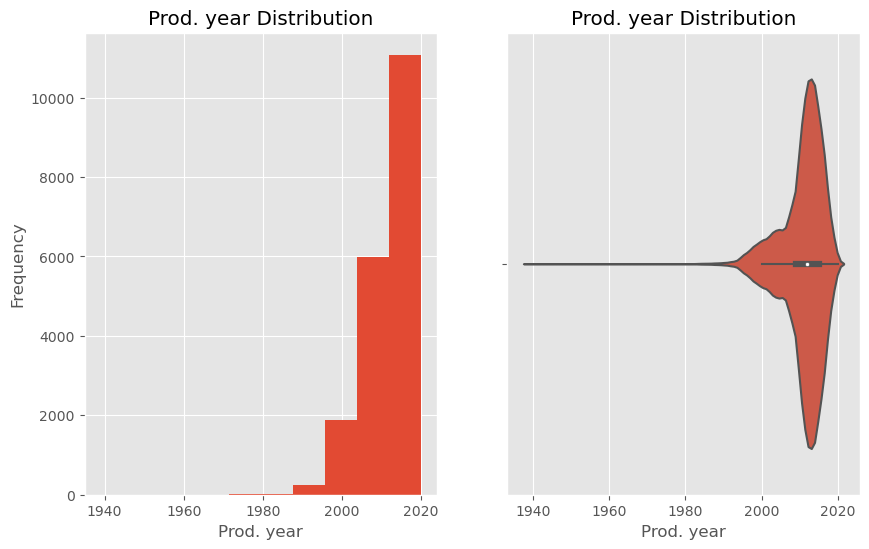

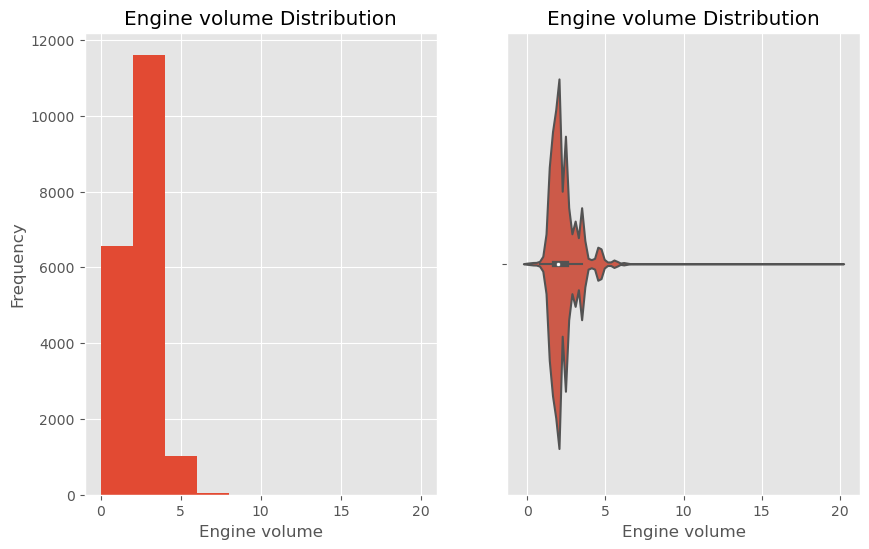

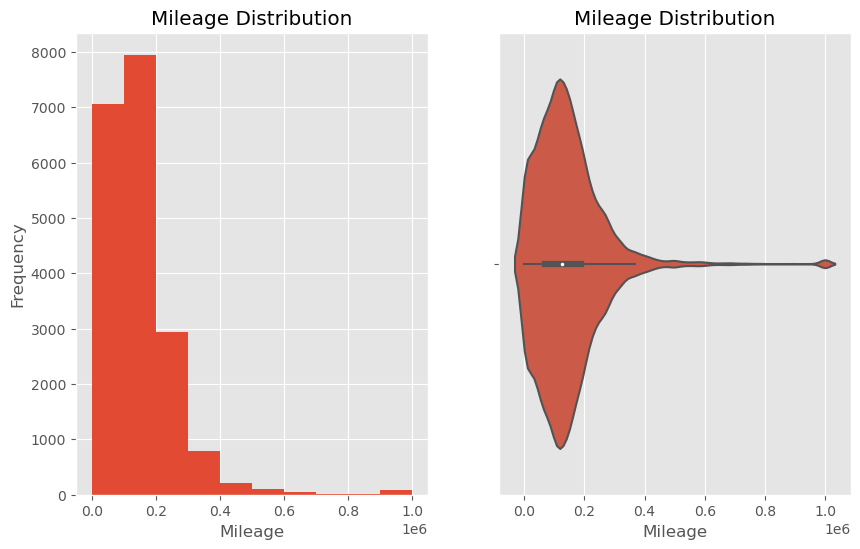

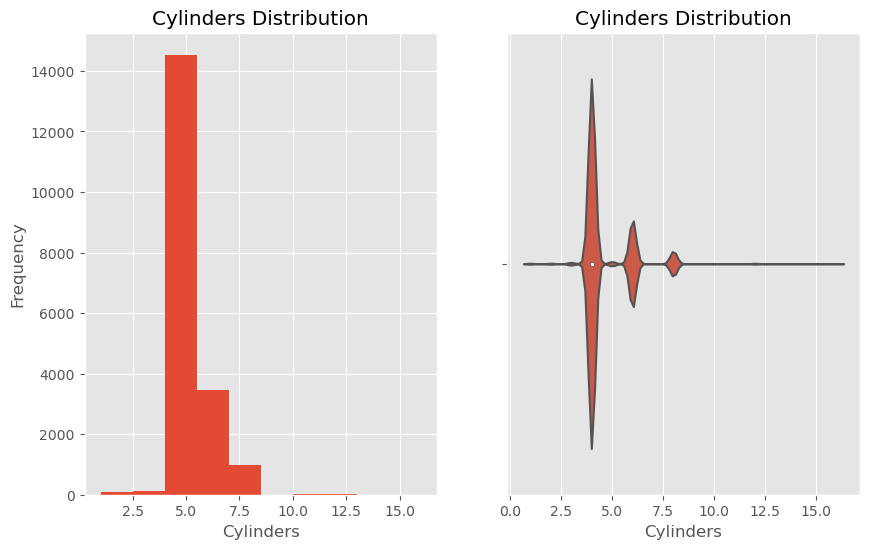

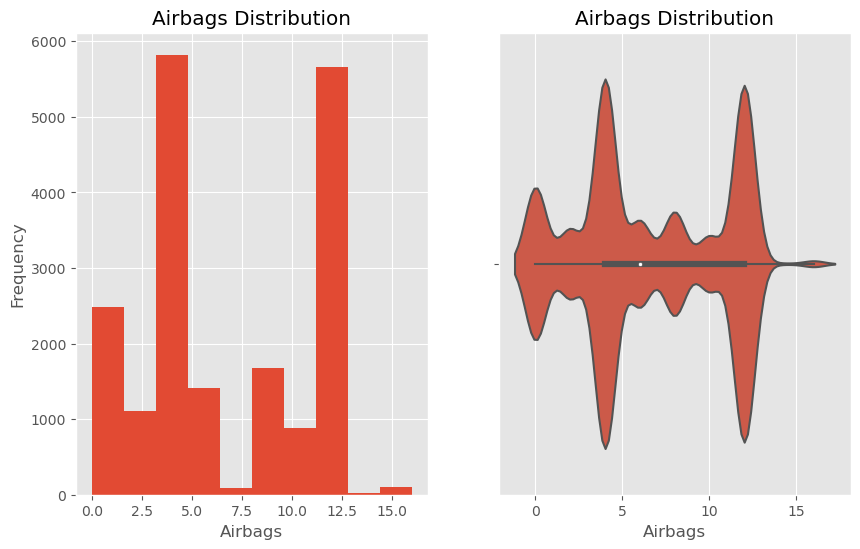

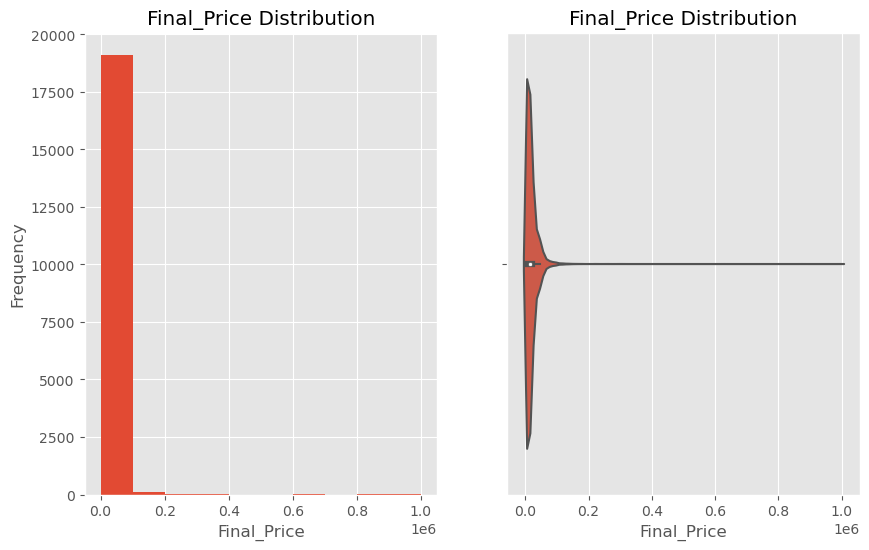

In [323]:
for i in numeric_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

    df[i].plot(kind='hist', ax=axes[0])
    axes[0].set_title(i + ' Distribution')
    axes[0].set_xlabel(i)
    
    sns.violinplot(data=df, x=i, ax=axes[1])
    axes[1].set_title(i + ' Distribution')

    plt.show()

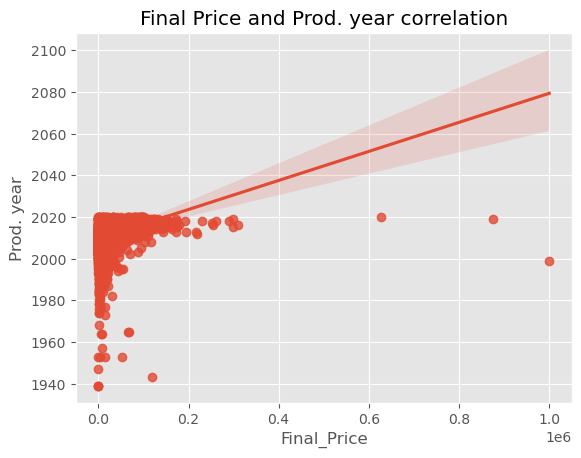

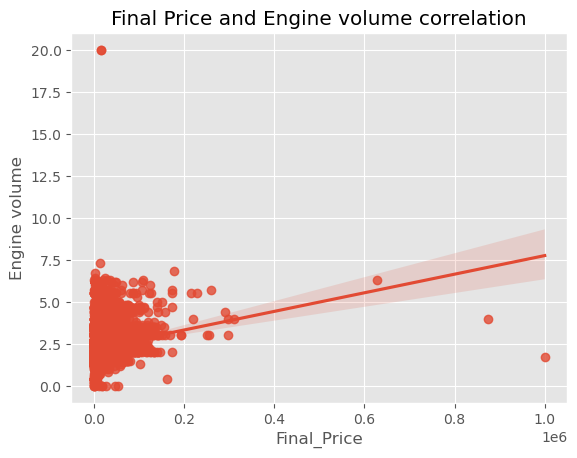

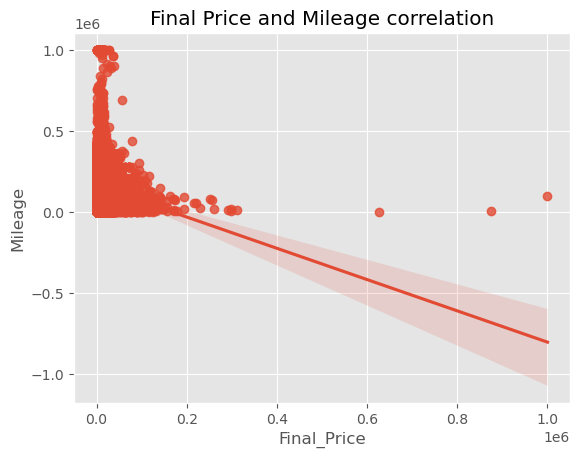

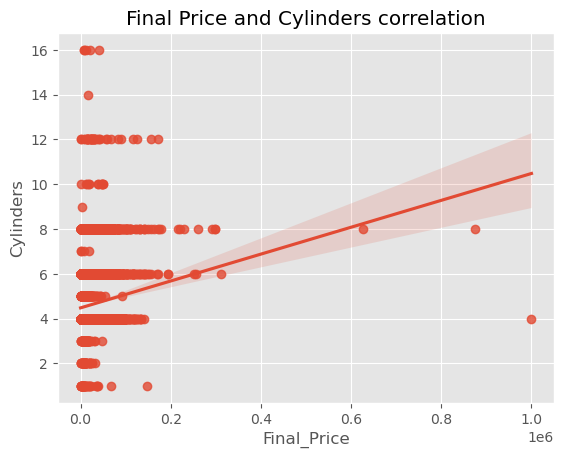

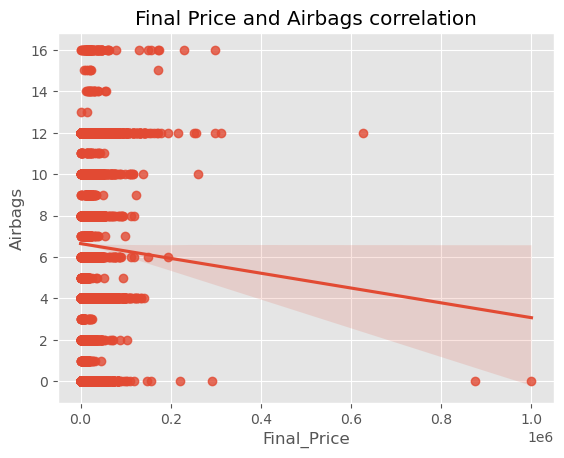

In [324]:
# corelation

for i in numeric_cols[:-1]:
    sns.regplot(x='Final_Price', y=i, data=df)
    plt.title('Final Price and {} correlation'.format(i))
    plt.show()

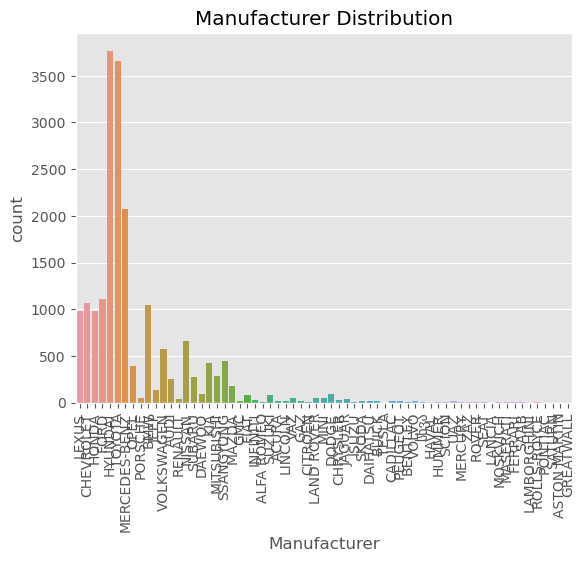

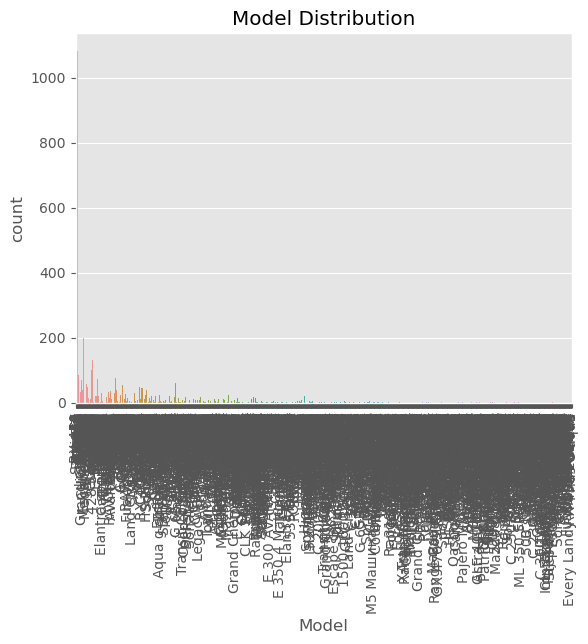

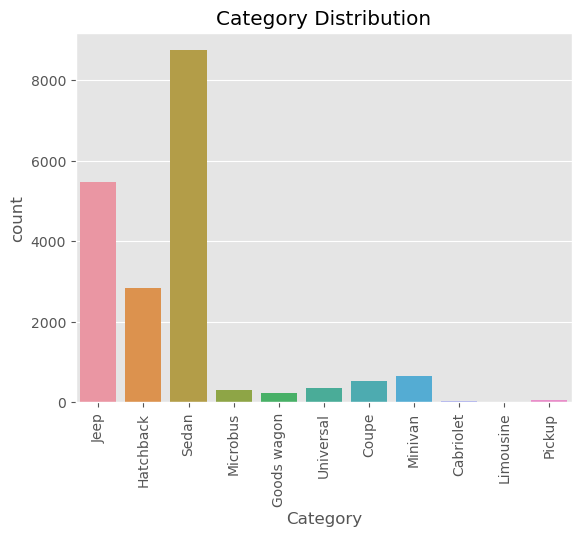

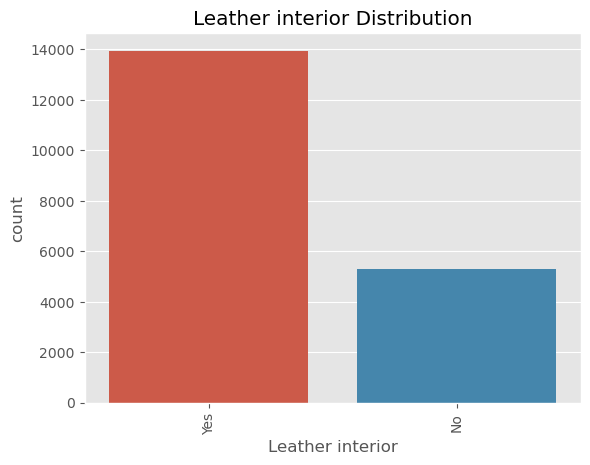

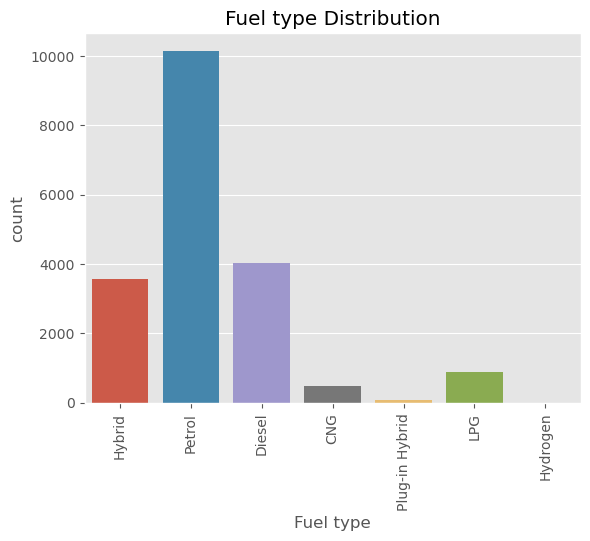

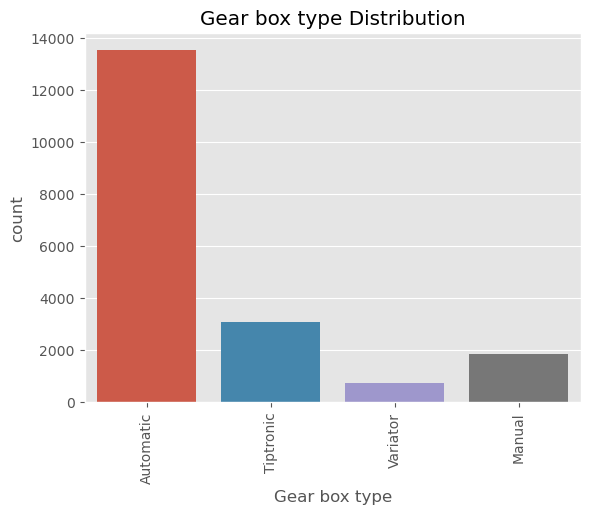

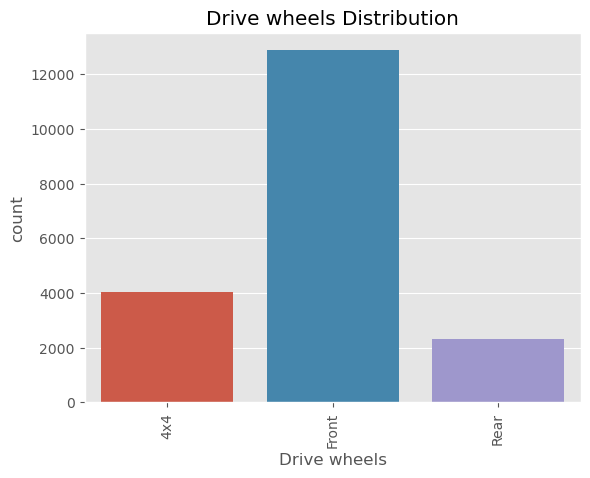

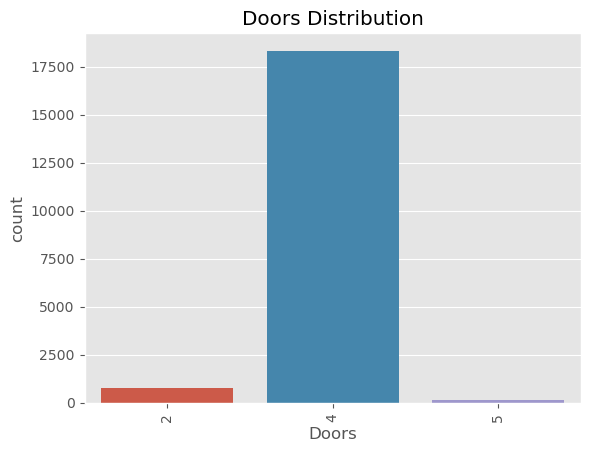

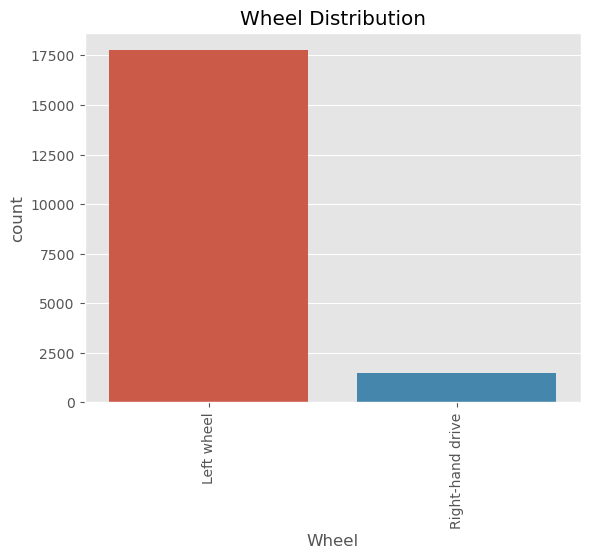

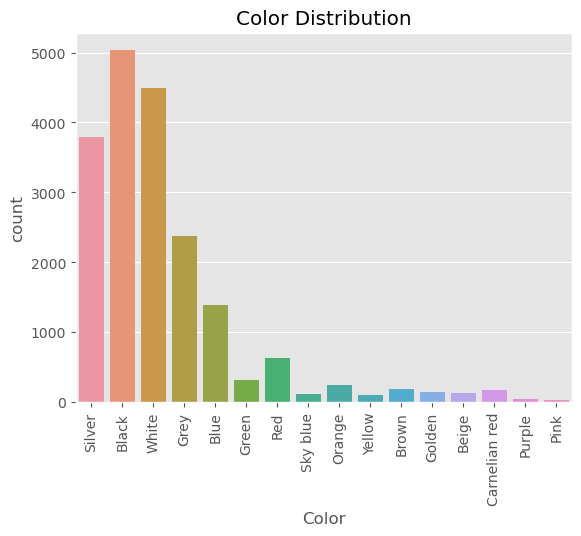

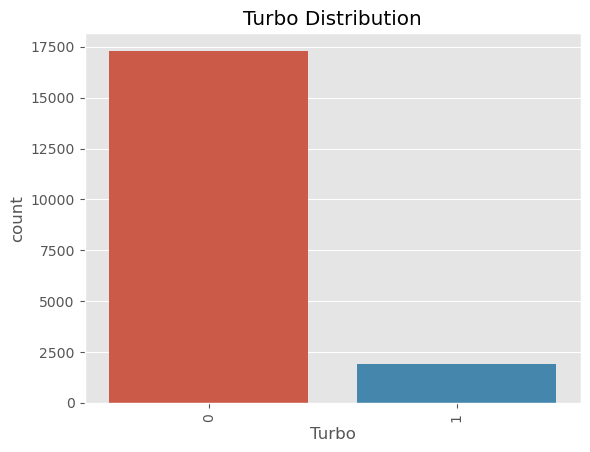

In [325]:
category_cols = df.select_dtypes(exclude='number').columns

for i in category_cols:

    sns.countplot(data=df, x=i)
    plt.title(i + ' Distribution')
    plt.xlabel(i)
    plt.xticks(rotation=90)

    plt.show()

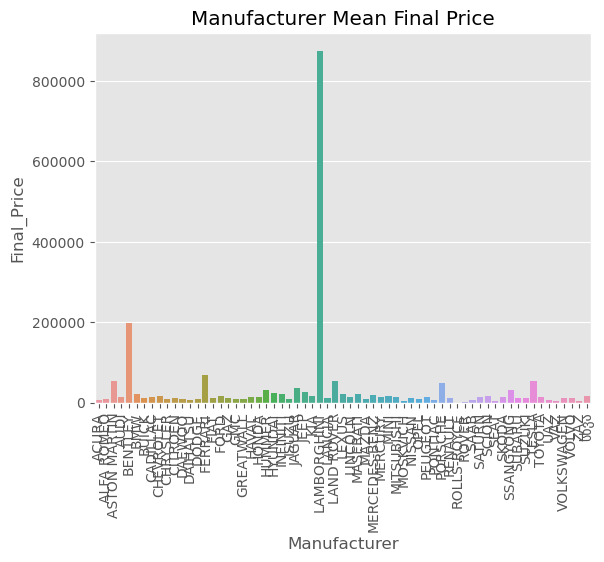

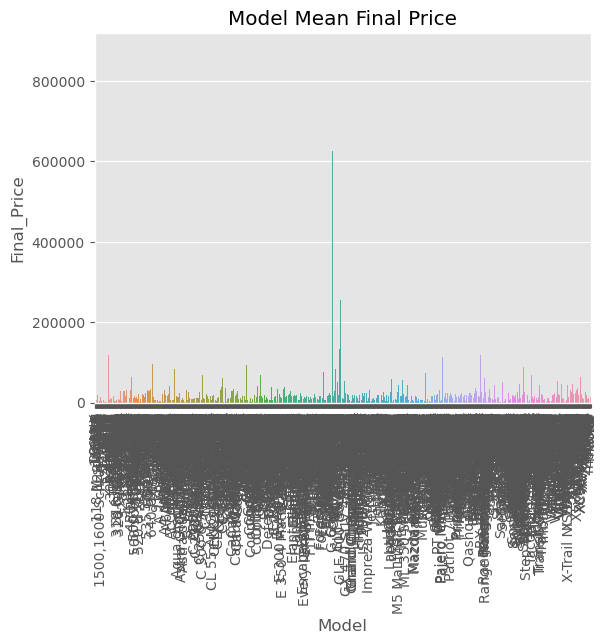

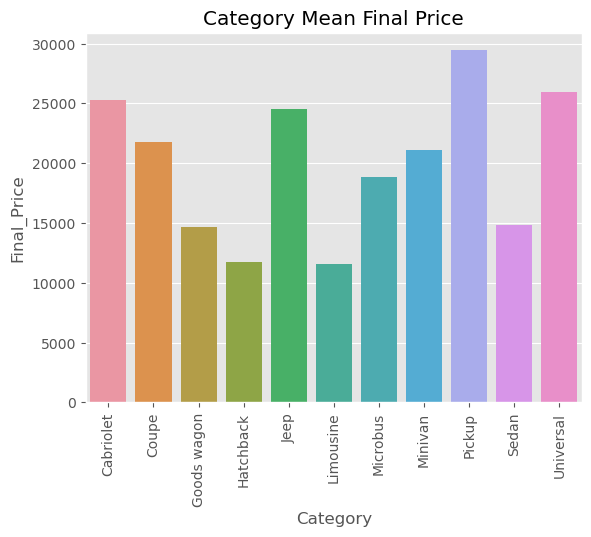

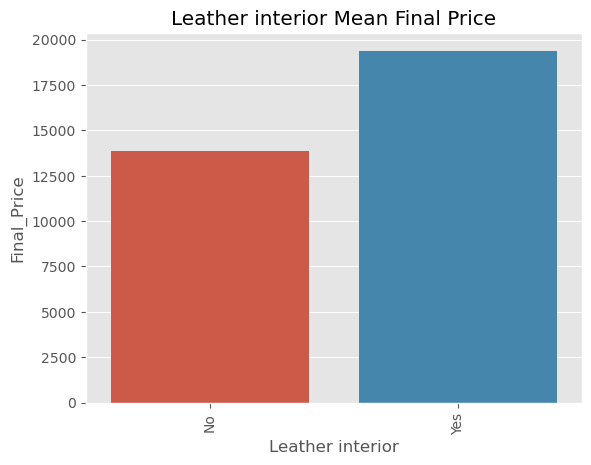

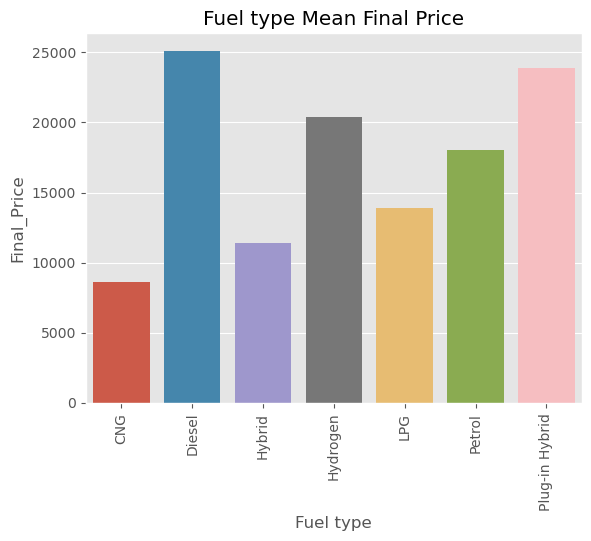

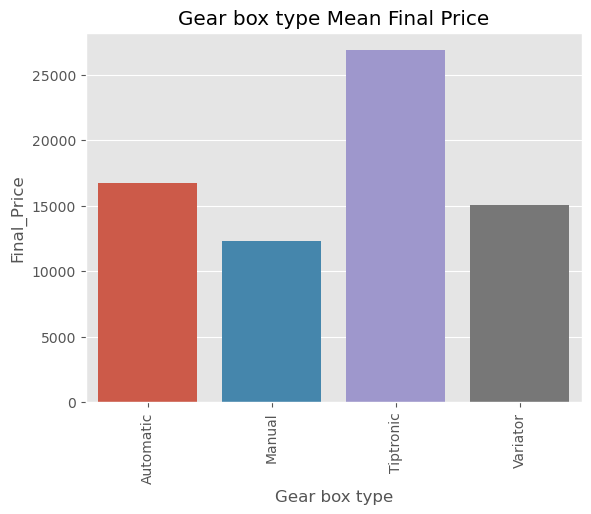

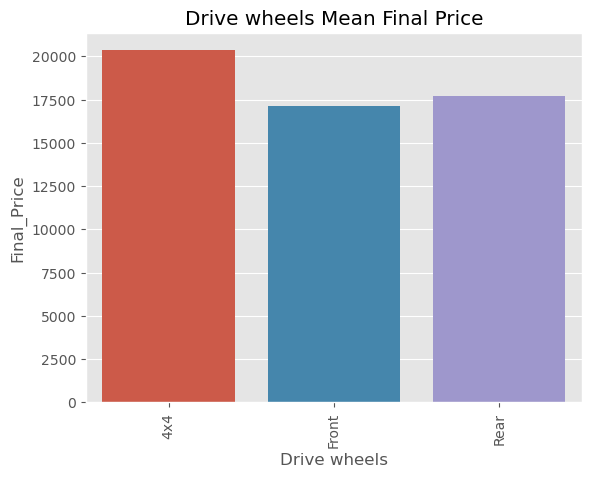

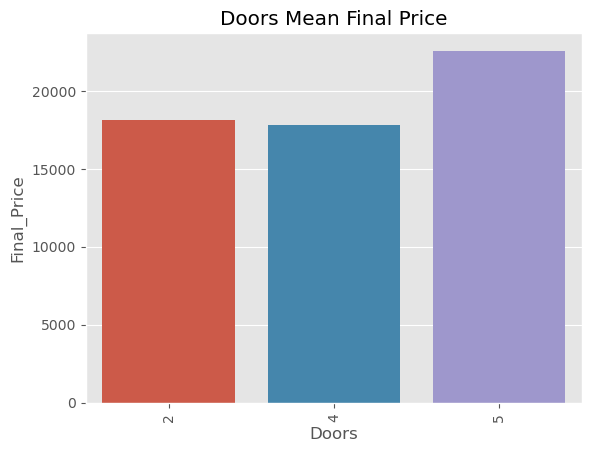

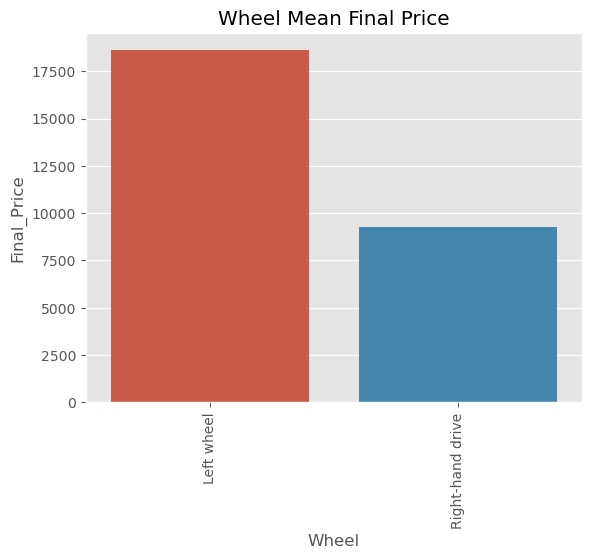

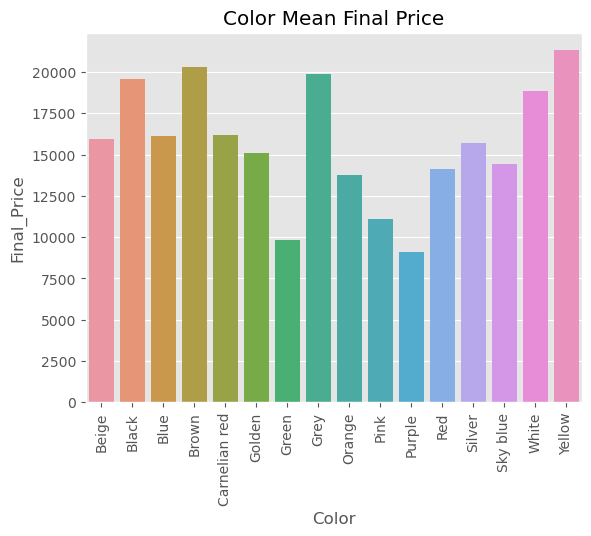

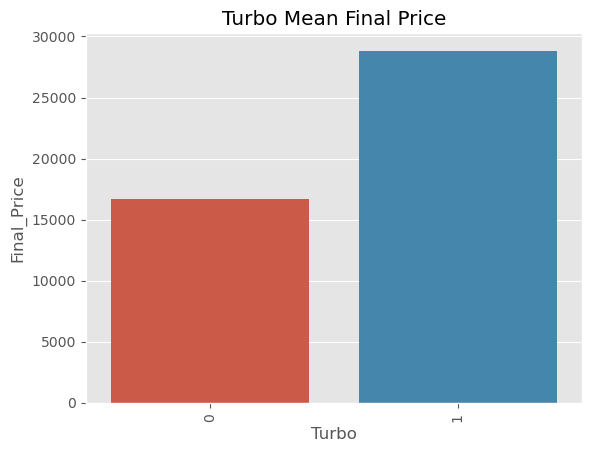

In [326]:
for i in category_cols:

    d = df.groupby(i)['Final_Price'].mean().reset_index()

    sns.barplot(data=d, x=i, y='Final_Price')
    plt.title(i + ' Mean Final Price')
    plt.xlabel(i)
    plt.xticks(rotation=90)

    plt.show()

# Features Engineering

In [327]:
cols_to_label_encode = ['Manufacturer','Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels']
cols_to_onehot_encode = ['Leather interior', 'Wheel', 'Color']
cols_to_scale = ['Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

In [328]:
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(pd.DataFrame(df[cols_to_onehot_encode]))
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(cols_to_onehot_encode))

df = pd.concat([df.drop(columns=cols_to_onehot_encode),onehot_encoded_df], axis=1)


c:\Users\Oleh\.conda\envs\env001\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [329]:
label_encoder = LabelEncoder()

for col in cols_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [330]:
scaler = StandardScaler()
scaled_cols =scaler.fit_transform(df[cols_to_scale])
scaled_df = pd.DataFrame(scaled_cols, columns=cols_to_scale)

df = pd.concat([df.drop(columns=cols_to_scale),scaled_df],axis=1)

In [331]:
X = df.drop(columns='Final_Price')
y = df['Final_Price']

print(X.shape)
print(y.shape)

(19237, 30)
(19237,)


In [332]:
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15389, 30)
(3848, 30)
(15389,)
(3848,)


# Model Selection

In [333]:
# Linear regression

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

lin_reg_pred = lin_reg_model.predict(X_test)


lin_reg_mae = round(metrics.mean_absolute_error(y_test,lin_reg_pred)*100,2)
lin_reg_rmse = round(np.sqrt(metrics.mean_squared_error(y_test,lin_reg_pred))*100,2)
lin_reg_r2 = round(metrics.r2_score(y_test,lin_reg_pred)*100,2)

print(lin_reg_mae)
print(lin_reg_rmse)
print(lin_reg_r2)

1042381.19
1545379.0
23.58


In [334]:
# Ridge regression

ridge_model = Ridge(alpha=100)

ridge_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)

ridge_mae = round(metrics.mean_absolute_error(y_test,ridge_pred)*100,2)
ridge_rmse = round(np.sqrt(metrics.mean_squared_error(y_test,ridge_pred))*100,2)
ridge_r2 = round(metrics.r2_score(y_test,ridge_pred)*100,2)

print(ridge_mae)
print(ridge_rmse)
print(ridge_r2)

1039744.21
1544527.56
23.66


In [335]:
# Lasso Regression

lasso_model = Lasso(alpha=100)

lasso_model.fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_test)

lasso_mae = round(metrics.mean_absolute_error(y_test,lasso_pred)*100,2)
lasso_rmse = round(np.sqrt(metrics.mean_squared_error(y_test,lasso_pred))*100,2)
lasso_r2 = round(metrics.r2_score(y_test,lasso_pred)*100,2)

print(lasso_mae)
print(lasso_rmse)
print(lasso_r2)

1037209.24
1544939.99
23.62


In [336]:
# SVM

svm_model = SVR(kernel='rbf')

svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

svm_mae = round(metrics.mean_absolute_error(y_test,svm_pred)*100,2)
svm_rmse = round(np.sqrt(metrics.mean_squared_error(y_test,svm_pred))*100,2)
svm_r2 = round(metrics.r2_score(y_test,svm_pred)*100,2)

print(svm_mae)
print(svm_rmse)
print(svm_r2)

1142248.84
1809889.59
-4.82


In [337]:
# Decision Tree

dt_model = DecisionTreeRegressor(criterion='poisson', random_state=random_seed)

dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_mae = round(metrics.mean_absolute_error(y_test,dt_pred)*100,2)
dt_rmse = round(np.sqrt(metrics.mean_squared_error(y_test,dt_pred))*100,2)
dt_r2 = round(metrics.r2_score(y_test,dt_pred)*100,2)

print(dt_mae)
print(dt_rmse)
print(dt_r2)

536338.73
1174442.1
55.86


In [338]:
# Random Forest

rf_model = RandomForestRegressor(n_estimators=120, criterion='poisson', random_state=random_seed)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mae = round(metrics.mean_absolute_error(y_test,rf_pred)*100,2)
rf_rmse = round(np.sqrt(metrics.mean_squared_error(y_test,rf_pred))*100,2)
rf_r2 = round(metrics.r2_score(y_test,rf_pred)*100,2)

print(rf_mae)
print(rf_rmse)
print(rf_r2)

433691.89
916806.94
73.1


In [339]:
gb_model = GradientBoostingRegressor(loss='squared_error', n_estimators=120, criterion='friedman_mse', random_state=random_seed)

gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)

gb_mae = round(metrics.mean_absolute_error(y_test,gb_pred)*100,2)
gb_rmse = round(np.sqrt(metrics.mean_squared_error(y_test,gb_pred))*100,2)
gb_r2 = round(metrics.r2_score(y_test,gb_pred)*100,2)

print(gb_mae)
print(gb_rmse)
print(gb_r2)

708179.13
1211633.64
53.02


# Model Comparison

In [347]:
comparison_table = pd.DataFrame({
    "Model Name":["Linear Regression", "Ridge Regression", "Lasso Regression", "SVM", "Decision Tree", "Random Forest", "Gradient Boost"],
    "MAE" : [lin_reg_mae, ridge_mae, lasso_mae, svm_mae, dt_mae, rf_mae, gb_mae],
    "RMSE" : [lin_reg_rmse, ridge_rmse, lasso_rmse, svm_rmse, dt_rmse, rf_rmse, gb_rmse],
    "R2" : [lin_reg_r2, ridge_r2, lasso_r2, svm_r2, dt_r2, rf_r2, gb_r2]
})

comparison_table

,Model Name,MAE,RMSE,R2
0,Linear Regression,"1,042,381.19","1,545,379.00",23.58
1,Ridge Regression,"1,039,744.21","1,544,527.56",23.66
2,Lasso Regression,"1,037,209.24","1,544,939.99",23.62
3,SVM,"1,142,248.84","1,809,889.59",-4.82
4,Decision Tree,"536,338.73","1,174,442.10",55.86
5,Random Forest,"433,691.89","916,806.94",73.10
6,Gradient Boost,"708,179.13","1,211,633.64",53.02


In [ ]:
pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(rf_pred, columns=['prediction'])], axis=1).sample(20)

,Final_Price,prediction
2097,30.00,336.48
440,"46,808.00","44,383.96"
3602,"33,687.00","34,468.82"
2121,"28,881.00","28,707.23"
1076,"23,032.00","60,653.19"
1108,"3,270.00","3,066.03"
303,"20,385.00","21,736.47"
3061,"25,684.00","22,729.90"
3219,"5,797.00","5,797.00"
1443,"7,527.00","7,633.28"


# Exporting model

In [343]:
with open("rf_model_reg.pkl", 'wb') as file:
    pickle.dump({
        'ohencoder': onehot_encoder,
        'lencoder' : label_encoder,
        'scaler': scaler,
        'model': rf_model
    }, file)

In [344]:
with open("rf_model_reg.pkl", 'rb') as file:
    loaded_objects = pickle.load(file)

In [346]:
loaded_objects['model'].predict(X_test)

array([24662.23333333, 12116.65      ,  5430.50833333, ...,
        2724.        , 15127.925     , 15263.59166667])